In [167]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [27]:
#fucntion to calculate the std and mean of the array
def calulateMeanAndStd(lst):
    arr = np.array(lst)
    print(f'mean = {np.mean(arr)} std = {np.std(arr)}')

In [231]:
#tring to implement 10-bandit problem
dataset = { 1 : [0, 3, 2, 0, 2, 0],
            2 : [4, 5, 1, 5, 6, 0],
            3 : [2, 0, 0, 0,3, 2],
            4 : [4, 3, 1, 1, 4],
            5 : [0, 0, 3, 0, 0, 5],
            6 : [4, 1, 3 ,0, 1, 4, 2],
            7 : [3, 6, 1, 3, 5, 0, 0],
            8 : [4, 4, 4, 4, 4, 4, 5],
            9 : [4, 1, 1, 1, 1, 5],
            10 : [2, 4 ,2, 0, 0, 0, 5, 1, 1]}

In [232]:
#all the values in the given data
for data in dataset:
    print(f'for leaver {data}', end = " ")
    calulateMeanAndStd(dataset[data])

for leaver 1 mean = 1.1666666666666667 std = 1.2133516482134197
for leaver 2 mean = 3.5 std = 2.217355782608345
for leaver 3 mean = 1.1666666666666667 std = 1.2133516482134197
for leaver 4 mean = 2.6 std = 1.3564659966250536
for leaver 5 mean = 1.3333333333333333 std = 1.9720265943665387
for leaver 6 mean = 2.142857142857143 std = 1.456862718169367
for leaver 7 mean = 2.5714285714285716 std = 2.1946130708196026
for leaver 8 mean = 4.142857142857143 std = 0.3499271061118826
for leaver 9 mean = 2.1666666666666665 std = 1.674979270186815
for leaver 10 mean = 1.6666666666666667 std = 1.6996731711975948


In [233]:
#this is the storage class
class storage:
    def __init__(self, epsilon, dataset):
        self.dataset = dataset
        self.epsilon = epsilon
        self.probablities = [0] * 11
        self.probablities[0] = -100
        self.reward_list = [[0, 0] for i in range(11) ] #index 0 is value and 1 is iterations
        self.history = [] #track the history of rewards
        self.number_interations = 0
        self.total_reward = 0
        self.mean = 0
        
    def greedy(self):
        #finding the max value
        max_value = max(self.probablities)
        max_index = self.probablities.index(max_value)
        
        #picking a random value from that given case
        ans = random.choice(self.dataset[max_index])
        
        #updating values 
        self.total_reward += ans
        self.number_interations += 1
        
        #updating probablities
        self.reward_list[max_index][1] += 1 #updating mean values
        self.reward_list[max_index][0] += ans
        self.probablities[max_index] = self.reward_list[max_index][0]/self.reward_list[max_index][1]        
        #appeding to history
        self.mean =  self.total_reward/ self.number_interations
        self.history.append(self.mean)
        
        return ans
    
    
    def exploration(self):
        rand_index = random.randint(1,10)
        ans = random.choice(self.dataset[rand_index])
        
        #updating values 
        self.total_reward += ans
        self.number_interations += 1
        
        #updating probablities
        self.reward_list[rand_index][1] += 1 #updating mean values
        self.reward_list[rand_index][0] += ans
        self.probablities[rand_index] = self.reward_list[rand_index][0]/self.reward_list[rand_index][1]
        #appeding to history
        self.mean =  self.total_reward/ self.number_interations
        self.history.append(self.mean)
        
        return ans
    
    def train(self):
        p = random.random()
        if(p >= self.epsilon):
            self.greedy()
        else:
            self.exploration()
            

In [269]:
e0 = storage(0, dataset)
e1 = storage(0.01, dataset)
e2 = storage(0.1, dataset)



In [270]:
for i in tqdm(range(int(4000))):
    e0.train()
    e1.train()
    e2.train()

100%|███████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 85275.65it/s]


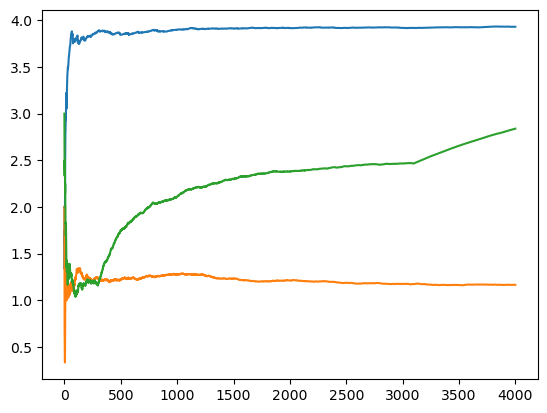

In [271]:
plt.plot(e2.history)
plt.plot(e0.history)
plt.plot(e1.history)

In [268]:
print(e0.mean, e1.mean, e2.mean)


1.1535 3.65625 3.90175
